In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import itertools
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential, load_model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam, SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [3]:
train=pd.read_csv('fashion-mnist_train.csv')
test=pd.read_csv('fashion-mnist_test.csv')

In [4]:
df=train

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(60000, 785)

In [10]:
df.isnull().sum().sum()

0

In [11]:
clothing={0: 'T-shirt/top',
         1:  'Trouser',
         2:  'Pullover',
         3:  'Dress',
         4:  'Coat',
         5:  'Sandal',
         6:  'Shirt',
         7:  'Sneaker',
         8:  'Bag',
         9: 'Ankle boot'}

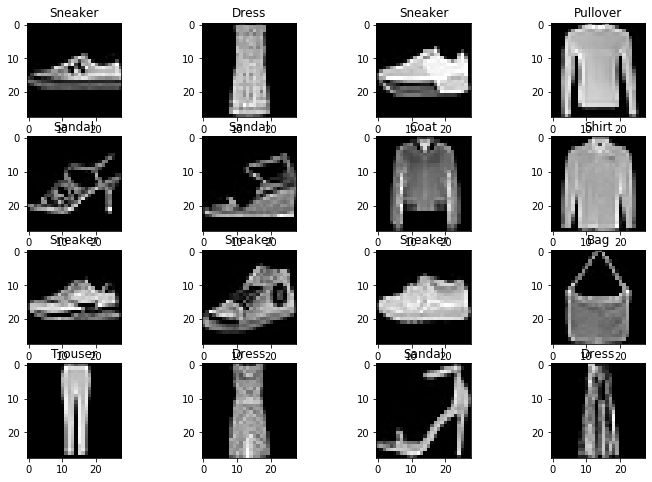

In [15]:
fig,axes=plt.subplots(4,4,figsize=(12,8))
for row in axes:
    for ax in row:
        index=np.random.randint(6000)
        img=df.drop('label',axis=1).values[index].reshape(28,28)
        cloths=df['label'][index]
        ax.imshow(img,cmap='gray')
        ax.set_title(clothing[cloths])
        

In [13]:
df.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

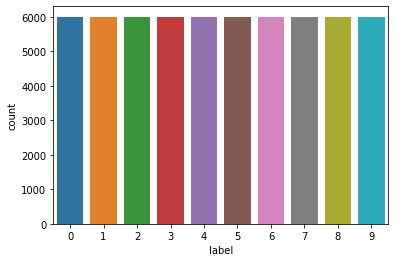

In [14]:
sns.countplot(df.label)

In [16]:
y=df.label
x=df.drop('label',axis=1)
x.shape,y.shape

((60000, 784), (60000,))

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=42)

In [19]:
#Reshaping images

In [20]:
xtrain=xtrain.values.reshape((-1,28,28,1))
xtest=xtest.values.reshape((-1,28,28,1))

In [21]:
#Normalizing the data

In [22]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [24]:
xtrain/=255.0
xtest/=255.0

In [25]:
ytrain=to_categorical(ytrain,num_classes=10)
ytest=to_categorical(ytest,num_classes=10)
ytrain.shape,ytest.shape

((54000, 10), (6000, 10))

In [26]:
# Building CNN model

In [27]:
def create_model():
    model=Sequential()
    
    model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))
    
    return model

In [28]:
model=create_model()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=50,batch_size=256,verbose=1,validation_data=(xtest,ytest))
model.evaluate(xtest,ytest)


Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 203s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1070
Epoch 2/50
54000/54000 [==============================] - 199s 4ms/step - loss: 2.3029 - accuracy: 0.0981 - val_loss: 2.3030 - val_accuracy: 0.0927
Epoch 3/50
54000/54000 [==============================] - 169s 3ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0930
Epoch 4/50
54000/54000 [==============================] - 168s 3ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0978
Epoch 5/50
54000/54000 [==============================] - 167s 3ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.0927
Epoch 6/50
54000/54000 [==============================] - 166s 3ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3028 - val_accuracy: 0.0930
Epoch 7/50
54000/54000 [==============================] - 167s 

[2.3028789030710857, 0.09300000220537186]

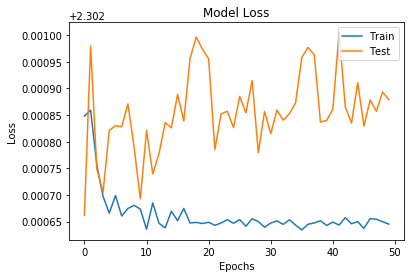

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

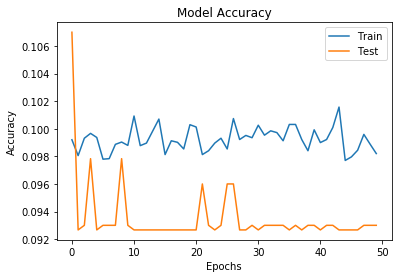

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [42]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(ytrue, pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.00      0.00      0.00       601
     Trouser       0.00      0.00      0.00       576
    Pullover       0.00      0.00      0.00       642
       Dress       0.00      0.00      0.00       631
        Coat       0.00      0.00      0.00       587
      Sandal       0.00      0.00      0.00       556
       Shirt       0.00      0.00      0.00       618
     Sneaker       0.00      0.00      0.00       610
         Bag       0.09      1.00      0.17       558
  Ankle Boot       0.00      0.00      0.00       621

    accuracy                           0.09      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.09      0.02      6000

